# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

This code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause
## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
1. Read through the code in the following sections:
    * [Iris Dataset](#Iris-Dataset)
    * [Visualization](#Visualization)
    * [Training and Visualization](#Training-and-Visualization)
2. Complete the three-part [Exercise](#Exercise)

In [358]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

import pandas

import random
import math

import copy

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [181]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [182]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization Setup

In [139]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

# set some bounds for the figures that will display the plots of clusterings with various
# hyperparameter settings
# this allows for NUM_COLS * NUM_ROWS plots in the figure
NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=30, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Visualization

This is the correct labeling, based on the targets.

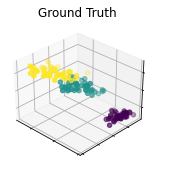

In [140]:
# start a new figure to hold all of the subplots
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", iris_df, iris.target)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

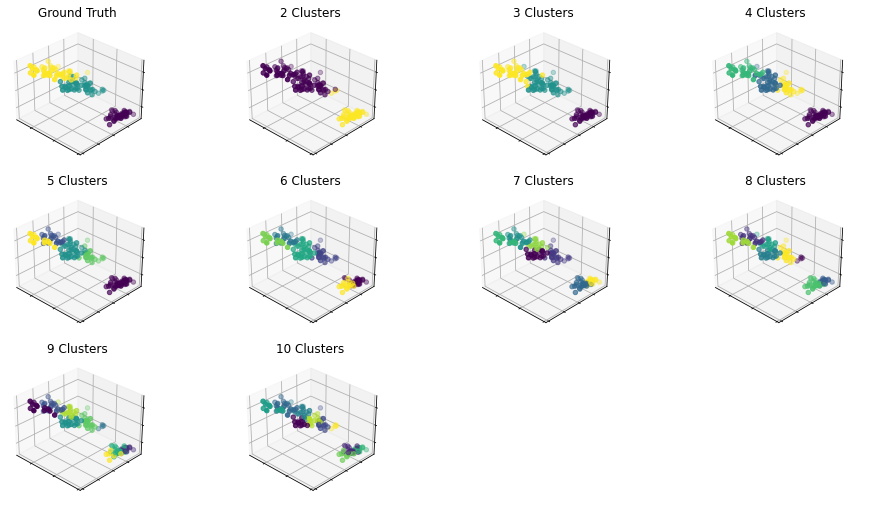

In [141]:
MAX_CLUSTERS = 10
# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", iris_df, iris.target)

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    plot_num += 1

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [ ]:
# your code here

# Implementing K-means From Scratch

In [63]:
def closest_centroid(point, centroid_list):
    distances = []
    for center in centroid_list:  # comparing distances from point to each centroid
        dist = math.hypot(*(x[0]-x[1] for x in zip(point, center)))  # https://stackoverflow.com/questions/5228383/how-do-i-find-the-distance-between-two-points
        distances.append(dist)
    val, idx = min((val, idx) for (idx, val) in enumerate(distances))  # https://stackoverflow.com/questions/13300962/python-find-index-of-minimum-item-in-list-of-floats
    return idx  # returns index of centroid closest to point

In [92]:
def average_point(point_list):
    return [sum(x)/len(x) for x in zip(*point_list)]  # https://stackoverflow.com/questions/55153446/getting-the-average-of-a-list-of-coordinates-in-python

In [54]:
def label_points(point_list, centroid_list):  # generates list of the corresponding centroid index for each point
    labels = []
    for point in point_list:
        labels.append(closest_centroid(point, centroid_list))
    return labels

In [55]:
def random_coords(point_list, num_coords):
    min_coords = [min(x) for x in zip(*point_list)]  # finds minimum for each column in point_list
    max_coords = [max(x) for x in zip(*point_list)]
    coords = []
    for i in range(num_coords):
        coords.append(list(random.uniform(x[0], x[1]) for x in zip(min_coords, max_coords)))  # loops through mins and maxs of columns
    return coords

In [56]:
def points_by_label(point_list, label_list, label):  # equivalent point_list[label_list == label] if they were pandas dfs
    points = []
    for i in range(len(point_list)):
        if label_list[i] == label:
            points.append(point_list[i])
    return points

In [332]:
def kmeans_clusters(point_list, num_clusters, num_iters):
    centroid_list = random_coords(point_list, num_clusters)
    for rep in range(num_iters):
        print(centroid_list)
        labels = label_points(point_list, centroid_list)  # assign centroid to each point
        for c in range(len(centroid_list)):  # change each centroid to average of points assigned to it
            centroid_list[c] = average_point(points_by_label(point_list, labels, c))
    return centroid_list, labels

## Testing on Iris Data

In [183]:
iris_inputs = iris.data[:,[0,3]]
iris_inputs_list = iris_inputs.tolist()

In [343]:
iris_centroids, iris_clusters = kmeans_clusters(iris_inputs_list, 3, 10)

[[5.405829754453949, 1.2129518579413618], [4.3877673204512915, 0.41441469868913017], [6.139656257882184, 1.0963774956885788]]
[[5.476470588235294, 1.1588235294117646], [4.8774999999999995, 0.23499999999999996], [6.515789473684206, 1.7249999999999996]]
[[5.539999999999998, 1.2233333333333334], [4.991836734693877, 0.24285714285714283], [6.5591549295774625, 1.849295774647887]]
[[5.654999999999999, 1.3450000000000002], [5.005999999999999, 0.2459999999999999], [6.666666666666663, 1.8966666666666658]]
[[5.728888888888888, 1.3844444444444441], [5.003921568627451, 0.2607843137254901], [6.731481481481478, 1.9314814814814811]]
[[5.8062499999999995, 1.4333333333333333], [5.003773584905661, 0.2886792452830188], [6.787755102040815, 1.9551020408163264]]
[[5.835294117647059, 1.4450980392156862], [5.003773584905661, 0.2886792452830188], [6.819565217391303, 1.976086956521739]]
[[5.835294117647059, 1.4450980392156862], [5.003773584905661, 0.2886792452830188], [6.819565217391303, 1.976086956521739]]
[[5.

## True Classes (2d)

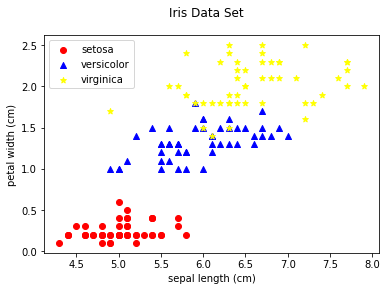

In [334]:
x1_feature = 0
x2_feature = 3

start_class_one = list(iris.target).index(1)
start_class_two = list(iris.target).index(2)

x1 = iris_inputs[:,0]
x2 = iris_inputs[:,1]

# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Iris Data Set')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = matplotlib.pyplot.scatter(x1[:start_class_one], x2[:start_class_one],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[start_class_one:start_class_two], x2[start_class_one:start_class_two],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[start_class_two:], x2[start_class_two:],
                                      c="yellow", marker="*", label=iris.target_names[2])

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
matplotlib.pyplot.show()

## Yoav K-Means Clusters (2d)

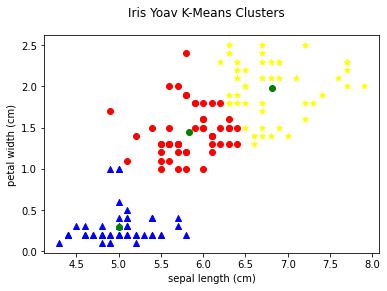

In [344]:
iris_labels = numpy.array(iris_clusters)

fig = matplotlib.pyplot.figure()
fig.suptitle('Iris Yoav K-Means Clusters')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

scatter_0 = matplotlib.pyplot.scatter(x1[iris_labels==0], x2[iris_labels==0],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[iris_labels==1], x2[iris_labels==1],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[iris_labels==2], x2[iris_labels==2],
                                      c="yellow", marker="*", label=iris.target_names[2])

#matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

matplotlib.pyplot.scatter(numpy.array(iris_centroids)[:,0], numpy.array(iris_centroids)[:,1],
                                      c="green", marker="o")

matplotlib.pyplot.show()

## Scikit K-Means Clusters (2d)

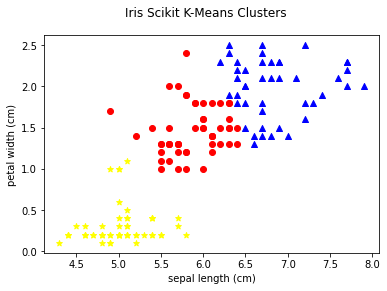

In [339]:
model = KMeans(n_clusters=3)
model.fit(iris_inputs)

iris_labels = model.labels_

fig = matplotlib.pyplot.figure()
fig.suptitle('Iris Scikit K-Means Clusters')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

scatter_0 = matplotlib.pyplot.scatter(x1[iris_labels==0], x2[iris_labels==0],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[iris_labels==1], x2[iris_labels==1],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[iris_labels==2], x2[iris_labels==2],
                                      c="yellow", marker="*", label=iris.target_names[2])

#matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

matplotlib.pyplot.show()

On the 2d level both my and the scikit models were very similar, with only 1 point different.

In [ ]:
metrics.adjusted_rand_csore

## All Models (3d)

[[6.634789990878901, 4.275733132462032, 6.338911238631608, 1.1632196516305155], [6.985155931477022, 3.5111964615777964, 2.4054741053261797, 0.12921815155737795], [5.817533736177974, 2.1116465189316482, 6.622238061500099, 1.2138173414543636]]
[[6.8199999999999985, 3.1524999999999994, 5.452499999999999, 1.9474999999999993], [5.188732394366197, 3.192957746478874, 2.1661971830985918, 0.5197183098591549], [6.033333333333333, 2.7128205128205125, 4.917948717948717, 1.6692307692307686]]
[[6.886486486486486, 3.099999999999999, 5.729729729729729, 2.0756756756756753], [5.0055555555555555, 3.3444444444444454, 1.5962962962962963, 0.3037037037037036], [5.955932203389831, 2.7677966101694924, 4.5, 1.4694915254237289]]
[[6.87027027027027, 3.0864864864864856, 5.745945945945945, 2.089189189189189], [5.005999999999999, 3.428000000000001, 1.4620000000000002, 0.2459999999999999], [5.904761904761906, 2.7460317460317465, 4.412698412698414, 1.4333333333333336]]
[[6.8500000000000005, 3.073684210526315, 5.742105

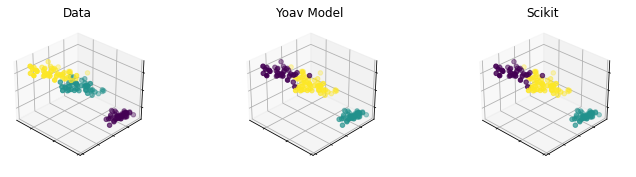

In [145]:
all_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

add_plot(all_figure, 1, "Data", iris_df, iris.target)

_, iris_clusters = find_clusters(iris.data.tolist(), 3, 10)
add_plot(all_figure, 2, "Yoav K-Means", iris_df, numpy.array(iris_clusters))

model = KMeans(n_clusters=3)
model.fit(iris_df)
labels = model.labels_
add_plot(all_figure, 3, "Scikit K-Means", iris_df, labels.astype(numpy.float))

I don't see any points different between my model and scikit.

# Implementing DBscan From Scratch

In [218]:
def within_radius(coord, center, radius):
    return radius >= math.hypot(*(x[0]-x[1] for x in zip(coord, center)))

In [219]:
def points_in_radius(point_list, center, radius, queue=[]):
    # create list of indices of points within the radius of center
    # ignore indices in queue, in order to not double count
    point_indices = []
    for j in range(len(point_list)):
        if not j in queue:
            if within_radius(point_list[j], point_list[center], radius):
                point_indices.append(j)
    return point_indices

In [312]:
def determine_cluster(point_list, center, radius, queue=[]):
    # this recursive function adds center to queue, looks for all points within a radius around center,
    # runs this function on them and sets queue equal to that, and returns queue
    
    # the really cool part (if I may say so myself), is the queue list which acts both to prevent the
    # function from double counting points, and storing all the new points that are found, to be sent upwards
    # via the return
    
    # it took me a really long to time to get this function right (you can see my debugging print statements below)
    # because it would always use the queue variable from the previous time it was run, and so finally I realized
    # that I had to deepcopy the queue
    
    #print('pre queue', queue, center)
    queue = copy.deepcopy(queue)
    queue.append(center)
    near_points = points_in_radius(point_list, center, radius, queue)
    #print('near points', near_points)
    for idx in near_points:
        queue = determine_cluster(point_list, idx, radius, queue)
        #print('queue', queue)
#        points = determine_cluster(point_list, idx, radius, queue)
#        print('points', points, idx)
#         for j in points:
#             if j not in queue:
#                 queue.append(j)
    return queue

In [313]:
def dbscan_clusters(point_list, radius, min_neighbor):
    cluster_counter = 2  # 0 means untested, 1 means noise, the rest are clusters
    labels = [0 for x in range(len(point_list))]
    for i in range(len(point_list)):
        if labels[i] == 0:
            #print('labels', labels)
            if len(points_in_radius(point_list, i, radius, [i])) >= min_neighbor:
                #print('idx thing', [idx for idx, val in enumerate(labels) if val > 1])
                new_cluster = determine_cluster(point_list, i, radius)
                for idx in new_cluster:
                    labels[idx] = cluster_counter
                cluster_counter += 1
            else:
                labels[i] = 1
    return labels

A small scale example of the function's capabilities; also what I used for debugging

In [196]:
test_list = [[1,1],[1,2],[1,3],[3,3],[3,4],[-1,0],[-2,0],[-3,3]]

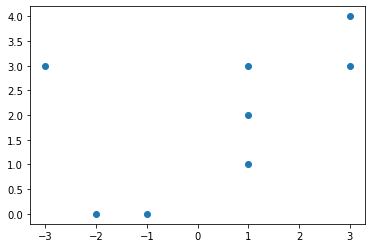

In [205]:
matplotlib.pyplot.scatter([x[0] for x in test_list], [x[1] for x in test_list])

In [308]:
dbscan_clusters(test_list, 1.5, 1)

labels [0, 0, 0, 0, 0, 0, 0, 0]
idx thing []
pre queue [] 0
near points [1]
pre queue [0] 1
near points [2]
pre queue [0, 1] 2
near points []
queue [0, 1, 2]
queue [0, 1, 2]
labels [2, 2, 2, 0, 0, 0, 0, 0]
idx thing [0, 1, 2]
pre queue [] 3
near points [4]
pre queue [3] 4
near points []
queue [3, 4]
labels [2, 2, 2, 3, 3, 0, 0, 0]
idx thing [0, 1, 2, 3, 4]
pre queue [] 5
near points [6]
pre queue [5] 6
near points []
queue [5, 6]
labels [2, 2, 2, 3, 3, 4, 4, 0]


[2, 2, 2, 3, 3, 4, 4, 1]

In [261]:
points_in_radius(test_list, 0, 1.5, [0])

[1]

In [307]:
determine_cluster(test_list, 0, 1.5)

pre queue [] 0
near points [1]
pre queue [0] 1
near points [2]
pre queue [0, 1] 2
near points []
queue [0, 1, 2]
queue [0, 1, 2]


[0, 1, 2]

## Testing on Iris Data

In [314]:
dbscan_clusters(iris_inputs_list, 0.3, 2)

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

## Yoav DBSCAN Clusters (2d)

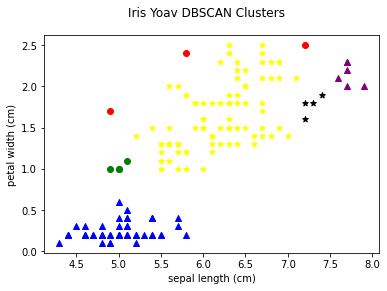

In [328]:
iris_labels = numpy.array(dbscan_clusters(iris_inputs_list, 0.28, 3))

fig = matplotlib.pyplot.figure()
fig.suptitle('Iris Yoav DBSCAN Clusters')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

scatter_1 = matplotlib.pyplot.scatter(x1[iris_labels==1], x2[iris_labels==1],
                                      c="red", marker="o")
scatter_2 = matplotlib.pyplot.scatter(x1[iris_labels==2], x2[iris_labels==2],
                                      c="blue", marker="^")
scatter_3 = matplotlib.pyplot.scatter(x1[iris_labels==3], x2[iris_labels==3],
                                      c="yellow", marker="*")
scatter_4 = matplotlib.pyplot.scatter(x1[iris_labels==4], x2[iris_labels==4],
                                      c="green", marker="o")
scatter_5 = matplotlib.pyplot.scatter(x1[iris_labels==5], x2[iris_labels==5],
                                      c="purple", marker="^")
scatter_6 = matplotlib.pyplot.scatter(x1[iris_labels==6], x2[iris_labels==6],
                                      c="black", marker="*")

matplotlib.pyplot.show()

DBSCAN recognizes the bottom class (setosa), but fails with the upper classes (versicolor and virginica) because they closesly overlap and are more dispersed. This shows though that my model works correctly.

## Yoav DBSCAN Model (3d)

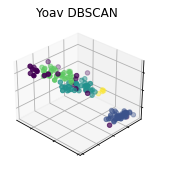

In [356]:
all_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

iris_labels = dbscan_clusters(iris.data.tolist(), 0.41, 3)
add_plot(all_figure, 1, "Yoav DBSCAN", iris_df, numpy.array(iris_labels))

In this case the model recognized that there were two upper classes, but that's more dependent on the radius that I choose. Overall there were a lot more points categorized as noise.

If I were to have more time to work on the model, I would have the DBSCAN standardize the data before determining the clusters, so that units won't affect the results, and so that the radius will have a meaning i.e. putting a 0.1 means the model will create clusters from points that are 0.1 standard deviations away from each other.

I would also be interested in creating a heirarchical clustering model.